# Random Forests

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
%matplotlib inline

import pydotplus
from IPython.display import Image


In [2]:
# Import csv file with tweets for elon musk
file_name='final_data_frame.csv'
file_path=Path(f"../Resources/{file_name}")
tweets_df = pd.read_csv(file_path, parse_dates=True, infer_datetime_format=True)
tweets_df.rename(columns={'Unnamed: 0': 'date' }, inplace=True)
tweets_df.set_index('date', inplace=True)
tweets_df

,TSLA,QQQ,Y_d1_pr_change_diff,Y_d5_pr_change_diff,quarterly report announcement flag,tweet count,number likes,number replies,number retweets clean,compound,...,mars,time,rocket,engine,soon,tesla,spacex,keyword strength,keyword flag,tweet flag
date,,,,,,,,,,,,,,,,,,,,,
2010-06-29,4.778000,39.031284,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-06-30,4.766000,38.437302,0.012707,NaN,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-07-01,4.392000,38.329292,-0.075662,NaN,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-07-02,3.840000,38.221321,-0.122866,NaN,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-07-06,3.222000,38.338306,-0.163998,NaN,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-13,854.409973,316.040009,-0.000902,0.102563,0.0,11.0,1734427.0,40100.0,213435.0,0.5226,...,1,0,0,1,0,0,1,4,1,1
2021-01-14,845.000000,314.350006,-0.005666,0.037489,0.0,7.0,559632.0,14544.0,38701.0,0.9357,...,1,0,0,0,0,0,0,2,1,1
2021-01-15,826.159973,311.859985,-0.014375,-0.038729,0.0,11.0,169339.0,9381.0,12439.0,0.9429,...,0,0,0,1,0,0,0,1,1,1


In [3]:
dropped_na_df = tweets_df.iloc[5:, :]
dropped_na_df

,TSLA,QQQ,Y_d1_pr_change_diff,Y_d5_pr_change_diff,quarterly report announcement flag,tweet count,number likes,number replies,number retweets clean,compound,...,mars,time,rocket,engine,soon,tesla,spacex,keyword strength,keyword flag,tweet flag
date,,,,,,,,,,,,,,,,,,,,,
2010-07-07,3.160000,39.562256,-0.051168,-0.352239,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-07-08,3.492000,39.778240,0.099604,-0.302196,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-07-09,3.480000,40.156231,-0.012939,-0.255315,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-07-12,3.410000,40.273220,-0.023028,-0.165664,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-07-13,3.628000,40.795197,0.050969,0.061924,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-13,854.409973,316.040009,-0.000902,0.102563,0.0,11.0,1734427.0,40100.0,213435.0,0.5226,...,1,0,0,1,0,0,1,4,1,1
2021-01-14,845.000000,314.350006,-0.005666,0.037489,0.0,7.0,559632.0,14544.0,38701.0,0.9357,...,1,0,0,0,0,0,0,2,1,1
2021-01-15,826.159973,311.859985,-0.014375,-0.038729,0.0,11.0,169339.0,9381.0,12439.0,0.9429,...,0,0,0,1,0,0,0,1,1,1


In [4]:
# Define features set
X = dropped_na_df.copy()
X = dropped_na_df.iloc[:, 4:]
X.head()


,quarterly report announcement flag,tweet count,number likes,number replies,number retweets clean,compound,positive,negative,neutral,sentiment,...,mars,time,rocket,engine,soon,tesla,spacex,keyword strength,keyword flag,tweet flag
date,,,,,,,,,,,,,,,,,,,,,
2010-07-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2010-07-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2010-07-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2010-07-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2010-07-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Define target vector
#y = tweets_df["col"].values.reshape(-1, 1)
y = dropped_na_df["Y_d5_pr_change_diff"].ravel()
y

array([-0.35223912, -0.30219645, -0.2553146 , ..., -0.03872879,
        0.03479567, -0.03018831])

In [6]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [7]:
# only `X_train` and `X_testing` DataFrames should be scaled
# Creating StandardScaler instance
scaler = StandardScaler()


In [8]:
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)
X_scaler

StandardScaler()

In [9]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)
X_scaled = X_scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.123718,-0.514269,-0.354280,-0.327611,-0.338233,-0.680971,-0.716086,-0.524356,-1.099535,-0.152106,...,-0.227590,-0.36681,-0.302667,-0.281382,-0.292664,-0.508623,-0.262189,-0.600481,-0.826793,-1.156903
1,-0.123718,-0.514269,-0.354280,-0.327611,-0.338233,-0.680971,-0.716086,-0.524356,-1.099535,-0.152106,...,-0.227590,-0.36681,-0.302667,-0.281382,-0.292664,-0.508623,-0.262189,-0.600481,-0.826793,-1.156903
2,-0.123718,-0.514269,-0.354280,-0.327611,-0.338233,-0.680971,-0.716086,-0.524356,-1.099535,-0.152106,...,-0.227590,-0.36681,-0.302667,-0.281382,-0.292664,-0.508623,-0.262189,-0.600481,-0.826793,-1.156903
3,-0.123718,-0.514269,-0.354280,-0.327611,-0.338233,-0.680971,-0.716086,-0.524356,-1.099535,-0.152106,...,-0.227590,-0.36681,-0.302667,-0.281382,-0.292664,-0.508623,-0.262189,-0.600481,-0.826793,-1.156903
4,-0.123718,-0.514269,-0.354280,-0.327611,-0.338233,-0.680971,-0.716086,-0.524356,-1.099535,-0.152106,...,-0.227590,-0.36681,-0.302667,-0.281382,-0.292664,-0.508623,-0.262189,-0.600481,-0.826793,-1.156903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,-0.123718,0.743113,7.069661,5.130107,7.511413,0.485031,0.237406,1.042701,0.847175,-0.152106,...,4.393873,-0.36681,-0.302667,3.553890,-0.292664,-0.508623,3.814037,1.573157,1.209492,0.864376
2650,-0.123718,0.285883,2.041136,1.651866,1.085101,1.406721,1.556066,1.565054,0.280123,-0.152106,...,4.393873,-0.36681,-0.302667,-0.281382,-0.292664,-0.508623,-0.262189,0.486338,1.209492,0.864376
2651,-0.123718,0.743113,0.370548,0.949168,0.119245,1.422785,0.514663,-0.524356,0.971218,-0.152106,...,-0.227590,-0.36681,-0.302667,3.553890,-0.292664,-0.508623,-0.262189,-0.057072,1.209492,0.864376
2652,-0.123718,1.543265,1.586898,1.694330,0.383897,1.545722,1.420818,0.015408,0.553523,-0.152106,...,-0.227590,-0.36681,-0.302667,-0.281382,-0.292664,-0.508623,-0.262189,0.486338,1.209492,0.864376


## Fitting the Random Forest Model


In [10]:
# Create a random forest instance and train it with the training data (`X_train_scaled` and `y_train`), define `n_estimators=500 (?)` and `random_state=72 (?)`.
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)


In [11]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)


## Making Predictions Using the Random Forest Model

In [12]:
# Validate the trained model, by predicting loan defaults using the testing data (`X_test_scaled`).
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
predictions

array([ 3.59387390e-03,  1.05135375e-02,  3.59387390e-03,  1.83724806e-02,
        1.33917320e-02,  3.59387390e-03,  3.59387390e-03,  3.59387390e-03,
        3.59387390e-03,  5.17706878e-02,  4.49361420e-02, -9.32144930e-04,
        3.59387390e-03,  1.06477574e-02,  3.59387390e-03,  3.59387390e-03,
        6.62845577e-03,  3.59387390e-03,  3.59387390e-03,  3.59387390e-03,
        3.59387390e-03,  3.59387390e-03, -1.65082246e-02,  3.59387390e-03,
        3.19329642e-03,  3.59387390e-03,  3.59387390e-03,  1.87516163e-03,
        3.59387390e-03,  9.02287545e-03,  3.59387390e-03,  6.54922038e-02,
        3.59387390e-03,  1.22182847e-02,  3.59387390e-03,  4.65360106e-02,
        9.14894684e-03,  3.59387390e-03,  3.59387390e-03, -4.41958951e-03,
        3.59387390e-03,  3.59387390e-03,  3.59387390e-03,  3.59387390e-03,
       -6.59749628e-03,  3.59387390e-03,  7.00953613e-03,  3.59387390e-03,
        3.59387390e-03,  3.75755157e-03,  8.44233184e-03,  3.59387390e-03,
        3.59387390e-03,  

## Model Evaluation

In [13]:
# Calculating MSE
mse = mean_squared_error(y_test, predictions)
# Displaying results
print(mse)

0.00564117805905732


In [14]:
# Calculating the accuracy score


## Feature Importance

In [15]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_


In [16]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1299463968968181, 'number likes'),
 (0.12228459904994497, 'number retweets clean'),
 (0.11796785346541705, 'number replies'),
 (0.11670817936653537, 'compound'),
 (0.08903348914793531, 'positive'),
 (0.08222923575921433, 'neutral'),
 (0.07064815113826681, 'negative'),
 (0.06612869665287407, 'tweet count'),
 (0.026721951335278247, 'keyword strength'),
 (0.02045353365758266, 'soon'),
 (0.014154997318303993, 'next week'),
 (0.012008971706699378, 'tesla'),
 (0.01165722011952232, 'engine'),
 (0.011215530787644873, 'production'),
 (0.011138836024046188, 'sustainable energy'),
 (0.010397119989198794, 'time'),
 (0.007868752891282913, 'launch'),
 (0.007531990675803026, 'rocket'),
 (0.00723008521150641, 'spacex'),
 (0.007118156377408219, 'starship'),
 (0.005874381228900935, 'mars'),
 (0.005574628739542636, 'coming soon'),
 (0.0054273398051207416, 'giga berlin'),
 (0.005040746883897979, 'self-driving'),
 (0.004833496068155529, 'next year'),
 (0.004208086714330796, 'solar power'),
 (0.00328035

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

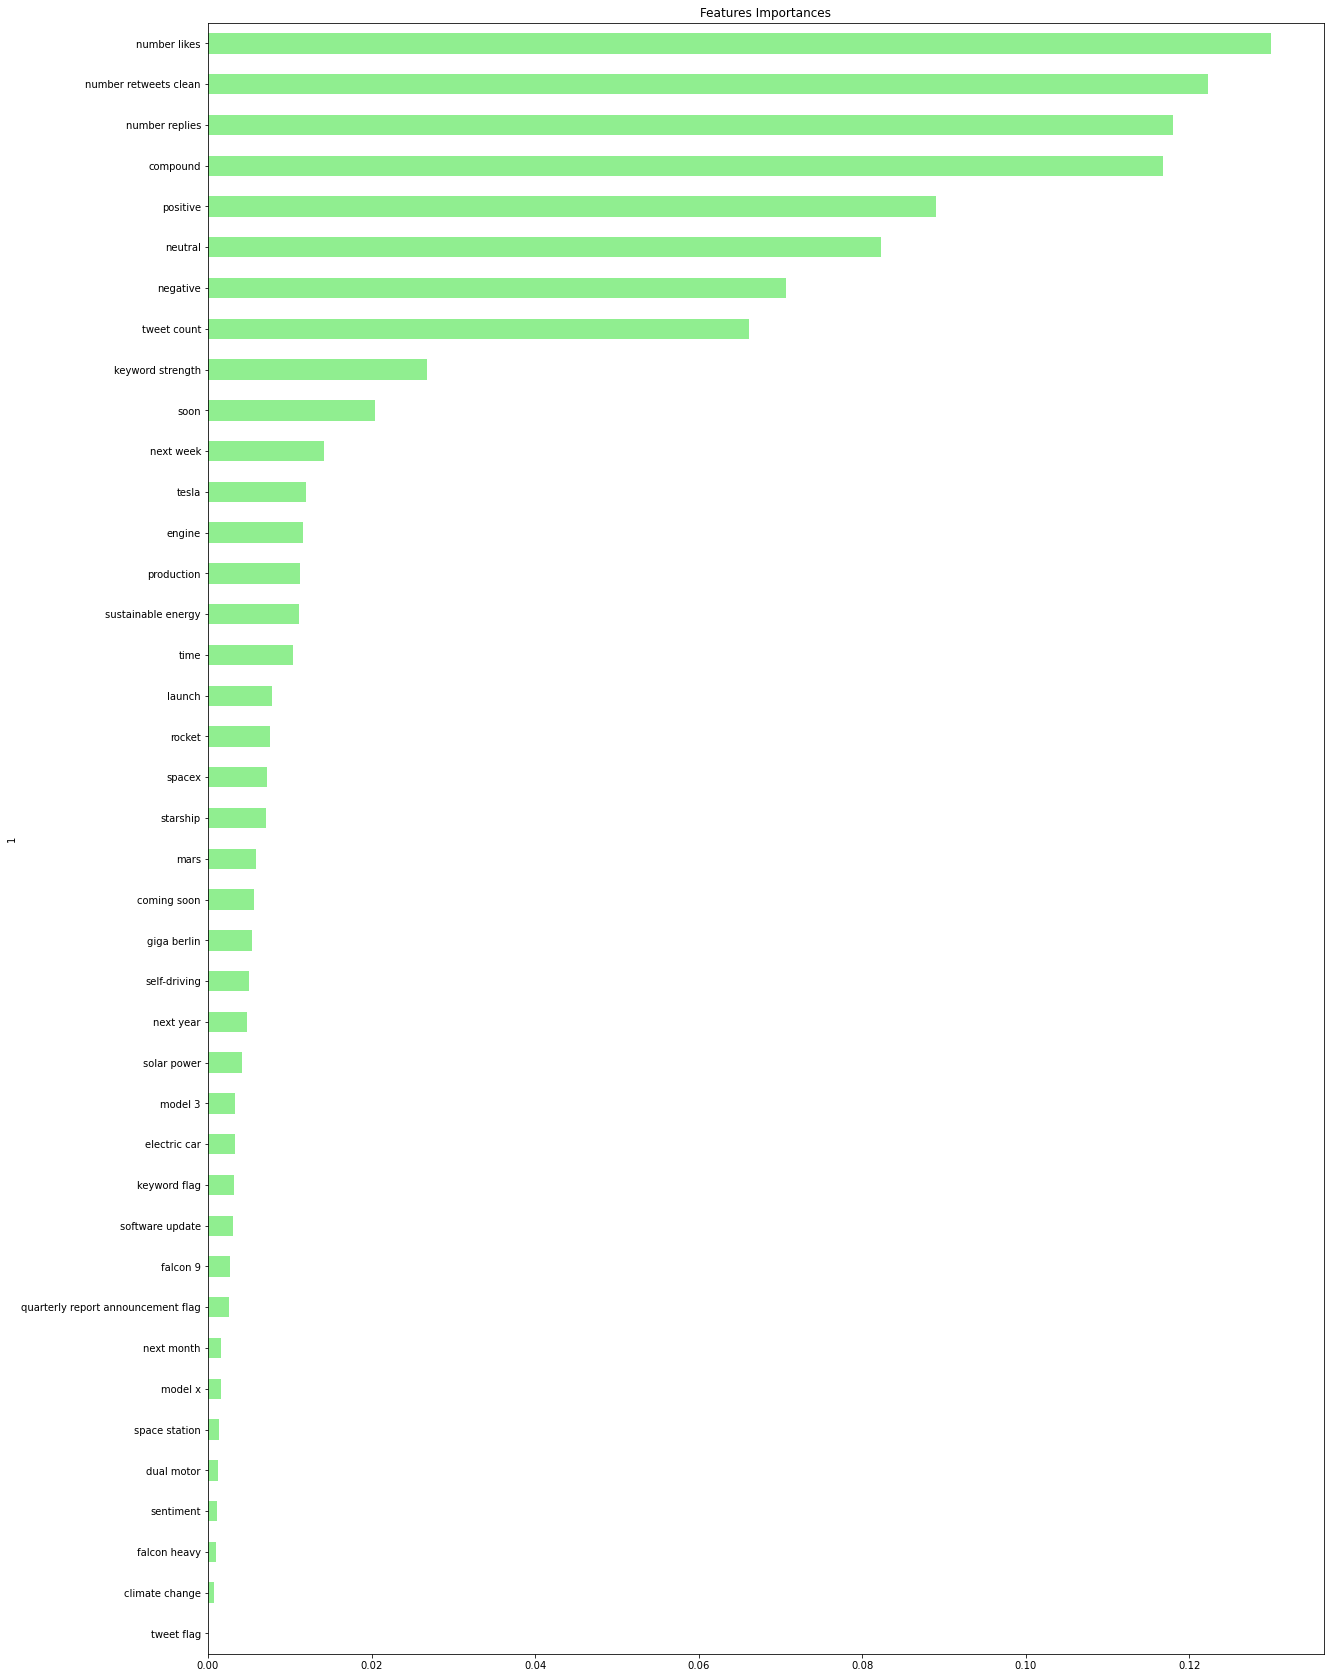

In [17]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', figsize=(20,30), legend=False)


---

In [18]:

new=pd.DataFrame()
new['y1']=dropped_na_df['Y_d1_pr_change_diff']
new['pct_change_tsla']=dropped_na_df['TSLA'].pct_change()
new['pct_change_qqq']=dropped_na_df['QQQ'].pct_change()
# new = new.iloc[:, :]
new

,y1,pct_change_tsla,pct_change_qqq
date,,,
2010-07-07,-0.051168,NaN,NaN
2010-07-08,0.099604,0.105063,0.005459
2010-07-09,-0.012939,-0.003436,0.009502
2010-07-12,-0.023028,-0.020115,0.002913
2010-07-13,0.050969,0.063930,0.012961
...,...,...,...
2021-01-13,-0.000902,0.005851,0.006753
2021-01-14,-0.005666,-0.011013,-0.005347
2021-01-15,-0.014375,-0.022296,-0.007921


In [19]:
new['Predicted Return'] = rf_model.predict(X_scaled)
new = new.iloc[1:, :]
new

,y1,pct_change_tsla,pct_change_qqq,Predicted Return
date,,,,
2010-07-08,0.099604,0.105063,0.005459,0.003594
2010-07-09,-0.012939,-0.003436,0.009502,0.003594
2010-07-12,-0.023028,-0.020115,0.002913,0.003594
2010-07-13,0.050969,0.063930,0.012961,0.003594
2010-07-14,0.088641,0.093716,0.005074,0.003594
...,...,...,...,...
2021-01-13,-0.000902,0.005851,0.006753,0.073398
2021-01-14,-0.005666,-0.011013,-0.005347,0.088399
2021-01-15,-0.014375,-0.022296,-0.007921,-0.022006


In [21]:
new['Signal'] = np.where(new['Predicted Return'] > 0.003594, 1.0, 0.0)

new['Signal'].value_counts()

# new.loc[new['signal']==1]


/opt/anaconda3/envs/machinelearning/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.0    1773
1.0     880
Name: Signal, dtype: int64

In [23]:
file_name="ML_algo.csv"
output_file = Path(f"../Resources/{file_name}")
new.to_csv(f"{output_file}")
